# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

      crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.15876   0.0  10.81   0.0  0.413  5.961  17.5  5.2873  4.0  305.0   
1  0.10328  25.0   5.13   0.0  0.453  5.927  47.2  6.9320  8.0  284.0   
2  0.34940   0.0   9.90   0.0  0.544  5.972  76.7  3.1025  4.0  304.0   
3  2.73397   0.0  19.58   0.0  0.871  5.597  94.9  1.5257  5.0  403.0   
4  0.04337  21.0   5.64   0.0  0.439  6.115  63.0  6.8147  4.0  243.0   

   ptratio   black  lstat  medv  
0     19.2  376.94   9.88  21.7  
1     19.7  396.90   9.22  19.6  
2     18.4  396.24   9.97  20.3  
3     14.7  351.85  21.45  15.4  
4     16.8  393.97   9.43  20.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-nu

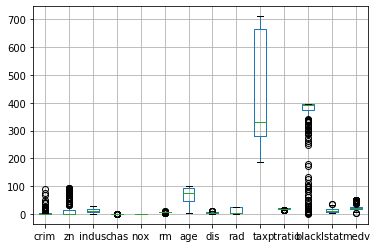

In [1]:
# Your code here

import pandas as pd
data=pd.read_csv('boston_data.csv')
print(data.head())
print(data.info())
data.boxplot() #thanks for the hint!

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

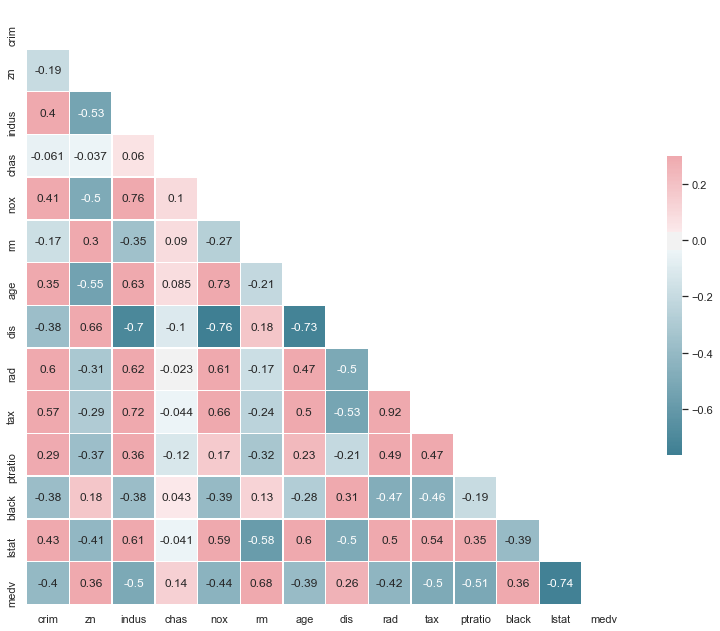

In [2]:
# Your plots here

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def heatmap_f(dataframe):

    corr = dataframe.corr()

    sns.set(style="white")

    mask = np.triu(np.ones_like(corr, dtype=np.bool))   # Generate a mask for the upper triangle

    f, ax = plt.subplots(figsize=(15, 11))              # Set up the matplotlib figure
    
    cmap = sns.diverging_palette(220, 10, as_cmap=True) # Generate a custom diverging colormap

    # Draw the heatmap
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
    return plt.show()


heatmap_f(data)

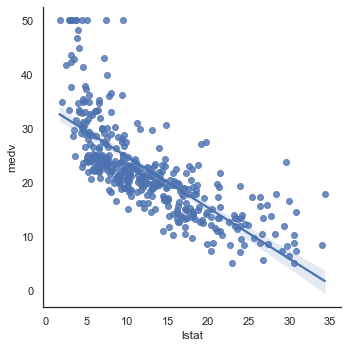

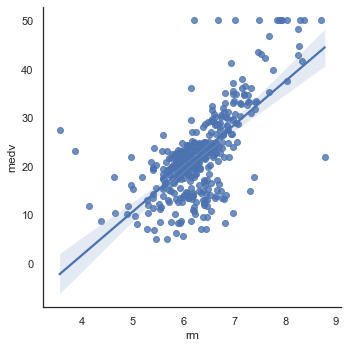

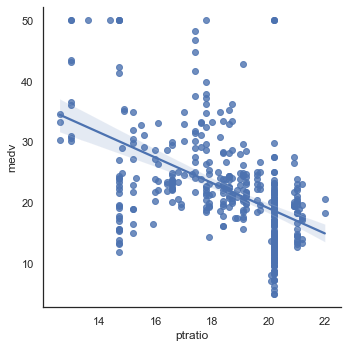

In [3]:
sns.lmplot(x='lstat',y='medv',data=data,fit_reg=True)
plt.show()
sns.lmplot(x='rm',y='medv',data=data,fit_reg=True)
plt.show()
sns.lmplot(x='ptratio',y='medv',data=data,fit_reg=True)
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
"""
This tells me that the LSTAT has a negative correlation with MEDV.
The lower the status pop the cheaper the housing gets.
RM has a positive correlation, as expected since the more number of rooms more the values rises.
PTRATION has a negative correlation with MEDV as expected since this means the you are reducing the number of teatchers
per student, this can mean that theres no demand on that specific area so by logic the price is cheaper.
"""

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

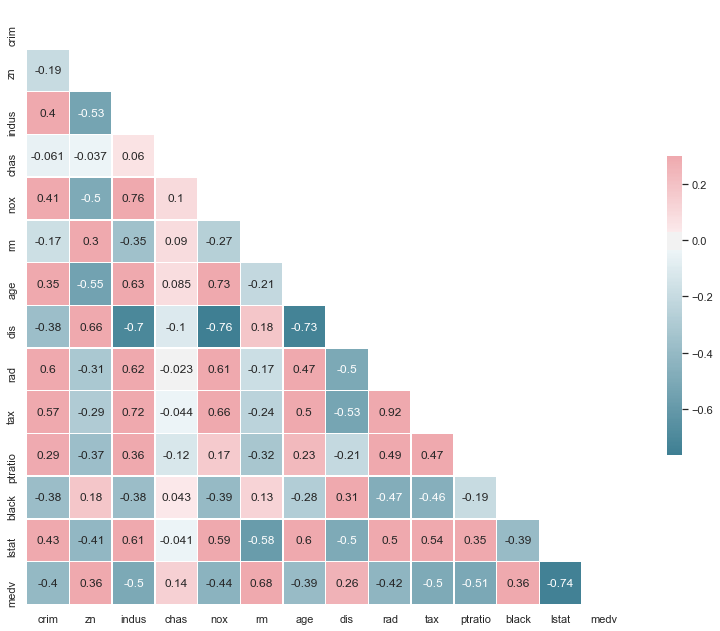

indus, tax and nox have high correlation


In [4]:
# Your response here

heatmap_f(data)

print("indus, tax and nox have high correlation")

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [5]:
# Your code here

data['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [6]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [7]:
# Your code here

from sklearn.model_selection import train_test_split

X = data.drop('medv', axis=1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [8]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor
max_depth=[1,2,4,6,8,10]

scores_train={}
scores_test={}

for i in max_depth:
    model = RandomForestRegressor(n_estimators=10, max_depth=i, n_jobs=-1, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores_test[i]=performance_metric(y_test, y_pred)
    scores_train[i]=performance_metric(y_train,model.predict(X_train))

print(scores_train)
print(scores_test)

{1: 0.5732037490069641, 2: 0.7671307659581154, 4: 0.9092566741422744, 6: 0.9515960752614434, 8: 0.966092941755127, 10: 0.9713255576181167}
{1: 0.5653648596036989, 2: 0.7681042310889266, 4: 0.8207929921548961, 6: 0.8492708372086313, 8: 0.8366855480710202, 10: 0.8438501024590401}


Now, plot the score for each tree on the training set and on the testing set.

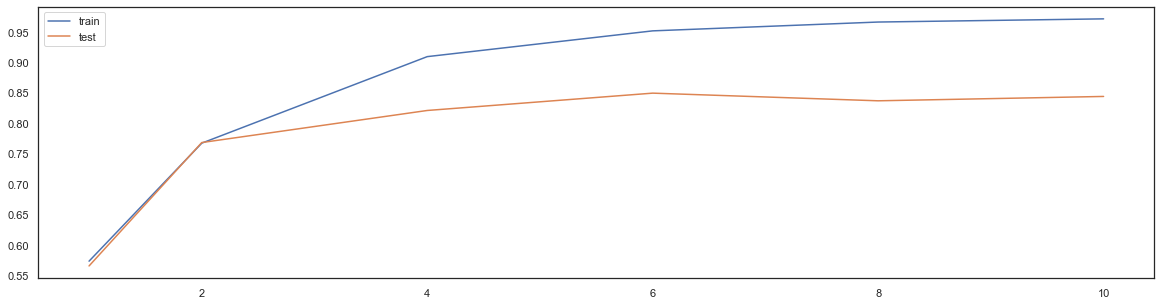

In [9]:
# Produce a plot with the score for the testing and training for the different max depths

plt.figure(figsize=(20,5))
plt.plot(list(scores_train.keys()),list(scores_train.values()),label="train")
plt.plot(list(scores_test.keys()),list(scores_test.values()),label="test")
plt.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
"""
We can see that our model overfits for larger depth values
"""

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here
"""
What is BIAS?
    Bias is the difference between the average prediction of our model and the correct value which we are trying to predict.
    Models with high BIAS shows that is a "care free model", usually oversimplified or coded with out care and attentition,
    having a high Bias value leads to having a high error on trainin and test data.
    
What is variance:
    Variance is te variability of the model prediction for a given data point, it can also tell us the spread (the delta
    variance) of our data.
    Models that have high variance pay a lot of attention and were coded in a way that doesn't generalise the "new" data
    (data that it didn't use to train or test).
    Because of this models with high variance perform extremely well with training data but generate a high error rate
    with test data.
"""

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
"""
Having said the trade off of each thing I think I would go towards a using max depth since it should produce a model with
mid or even high varianc, but not being a oversimplified model will hopefully mean that I get a good result.
"""

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
"""
How relevant today is data that was collected from 1978?
-> For most part not relevant, unless we would like to study the market progression.

Are the features present in the data sufficient to describe a home?
->No, not at all.

Is the model robust enough to make consistent predictions?
->I dont think so, we have far to samml of a training dataset to have good and consistent predictions.

Would data collected in an urban city like Boston be applicable in a rural city?
->No, those are two totally different markets, and as such react and are valued in a very different way.

"""